In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spst

# Create and plot some distributions

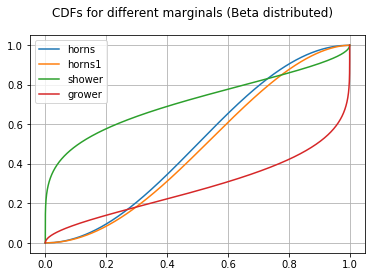

In [7]:
n=500
smpl=np.linspace(0,1,num=n)
params={}
cdfs={'horns':spst.beta.cdf(smpl,0.5,0.5),
      'horns1':spst.beta.cdf(smpl,0.5,0.55),
      'shower':spst.beta.cdf(smpl,5.,2.),
      'grower':spst.beta.cdf(smpl,2.,5.)}
#plot the cdfs
fig, ax = plt.subplots()
list(map(lambda cdf: ax.plot(cdf,smpl) , cdfs.values()))
ax.legend(list(cdfs.keys()))
fig.suptitle(f'CDFs for different marginals (Beta distributed)')
plt.grid()
plt.savefig('../cdfs_beta_different.png', dpi=100)
plt.show()

In [3]:
#functions for frechet bounds, 2d
def plot_frechet(x,y,xlabel,ylabel,figname):
    bottom_frechet = lambda x,y: np.array([max(xi+y[i]+1-2, 0) 
                                         for i,xi in enumerate(x) ])
    top_frechet = lambda x,y: np.array([min(xi,y[i]) for i,xi in enumerate(x)])
    #plot the trisurf for frechet bottom and top
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1,2,1,projection='3d') 
    ax.plot_trisurf(x,y,bottom_frechet(x,y), 
                    linewidth=0.2, antialiased=True,alpha=0.7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel('Bottom Frechet')
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.plot_trisurf(x,y,top_frechet(x,y), color='#8f1d14',
                    linewidth=0.2, antialiased=True,alpha=0.7)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel('Top Frechet')
    plt.savefig(f'../{figname}.png', dpi=100, tight_layout=True)
    plt.show()

# Visualise bounds for combinations of distributions

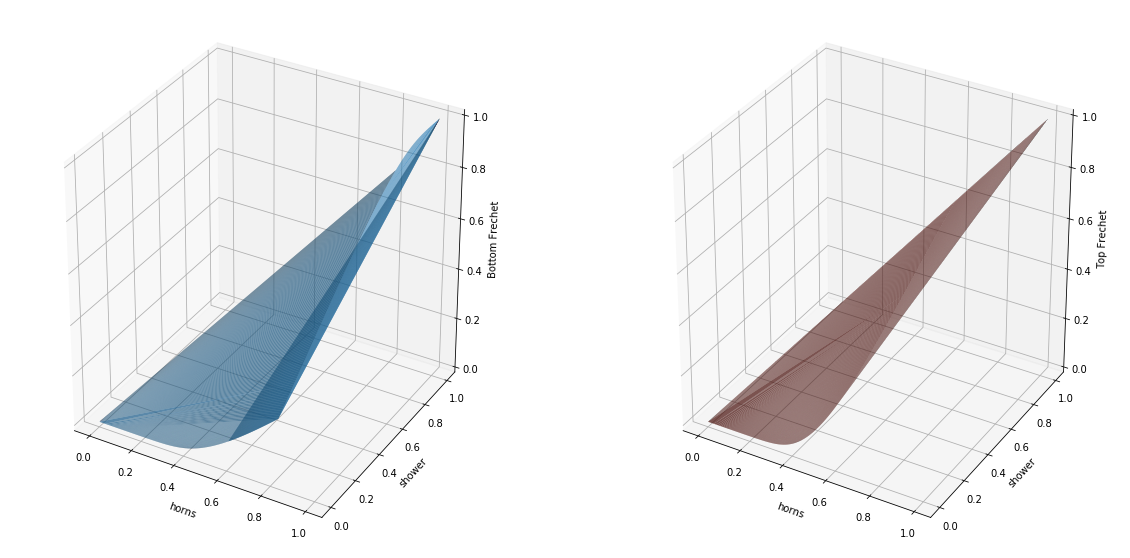

In [4]:
x=cdfs['horns']
y=cdfs['shower']
plot_frechet(x,y,'horns','shower','frechet_horns_shower')

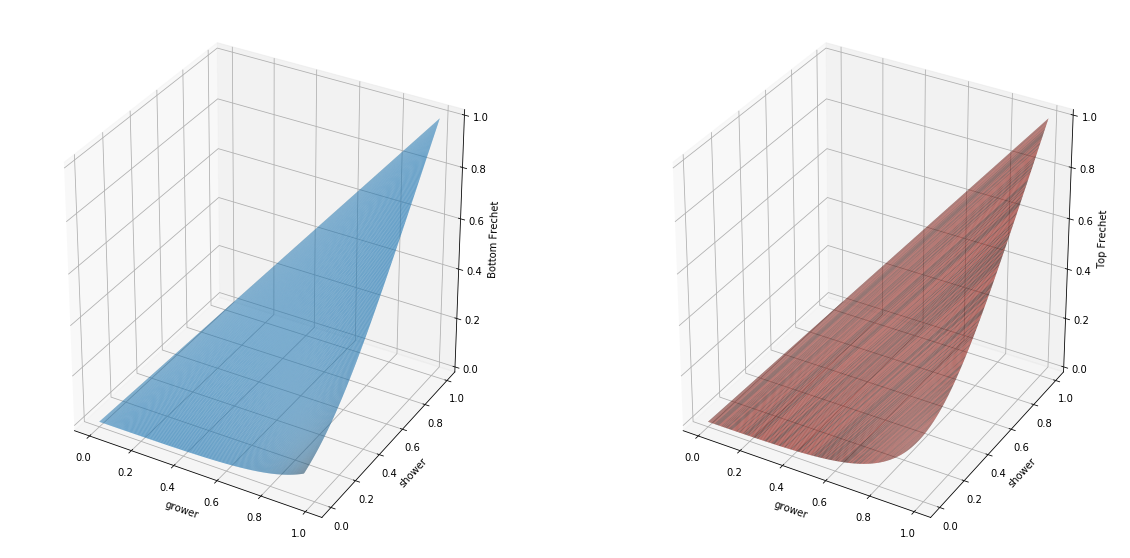

In [5]:
x=cdfs['grower']
y=cdfs['shower']
plot_frechet(x,y,'grower','shower','frechet_grower_shower')

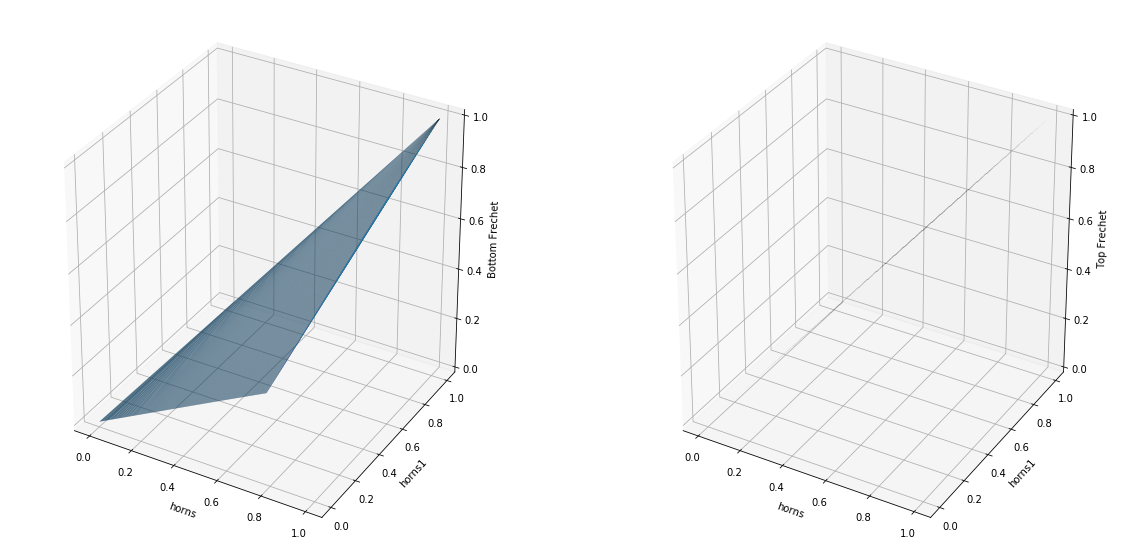

In [6]:
x=cdfs['horns']
y=cdfs['horns1']
plot_frechet(x,y,'horns','horns1','frechet_very_similar_dfs')